In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sns.set_style('whitegrid')
colors = sns.color_palette("pastel")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('Dataset/국방부_신분별 군 정원_20211231.csv', encoding = 'cp949')
df.iloc[:, 2:] = df.iloc[:, 2:].mul(10000)
df.head()

,연도,구분,장교,부사관,병,군무원
0,2010,육군,52000.0,70000.0,398000.0,12000.0
1,2010,해군,7000.0,18000.0,17000.0,4000.0
2,2010,해병대,2000.0,5000.0,20000.0,1000.0
3,2010,공군,11000.0,19000.0,35000.0,4000.0
4,2010,기타,0.0,0.0,0.0,5000.0


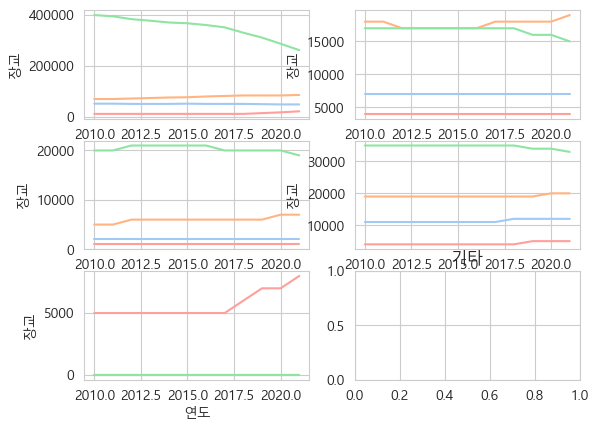

In [3]:
list_sol_type = df.columns[2:]
list_pos_type = df['구분'].unique()

fig, ax = plt.subplots(nrows=3, ncols = 2)
for i in range(5):
    for j in range(4):
        df_s = df[df['구분'] == list_pos_type[i]]
        sns.lineplot(x = df_s['연도'], y = df_s[list_sol_type[j]], 
                     color = colors[j],
                     ax = ax[i//2, i%2])
        
        plt.title(list_pos_type[i])
        
plt.show()

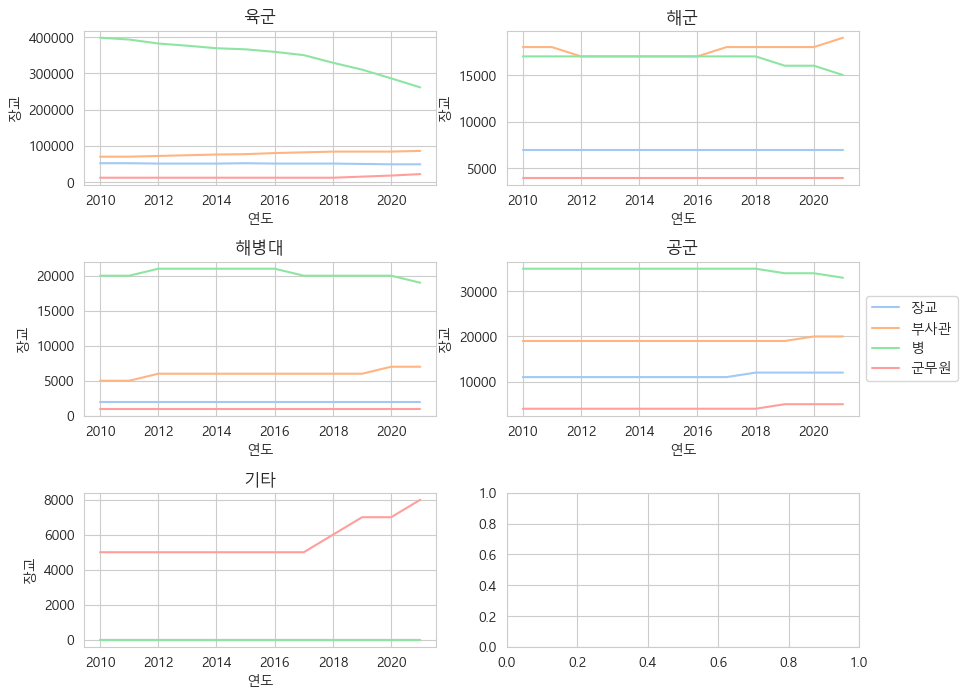

In [4]:
list_sol_type = df.columns[2:]
list_pos_type = df['구분'].unique()

fig, axes = plt.subplots(3, 2, figsize = (10, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i in range(5):
    
    pos = list_pos_type[i]
    
    for j in range(4):
        
        sol = list_sol_type[j]
        
        ax_row = i//2
        ax_col = i%2
        
        label = sol
        
        df_s = df[df['구분'] == pos]
        sns.lineplot(x = df_s['연도'], y = df_s[sol], 
                     color = colors[j],
                     ax = axes[ax_row, ax_col],
                     label = label)
        
        axes[ax_row, ax_col].set_title(pos)
        
        ax = axes.flat[i]
        ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
        
        if i != 3:
            ax.legend([], [], frameon=False)
            
plt.show()

In [5]:
df_g = df.groupby(['연도'])[['장교', '부사관', '병', '군무원']].sum().reset_index()
df_g

,연도,장교,부사관,병,군무원
0,2010,72000.0,112000.0,470000.0,26000.0
1,2011,72000.0,112000.0,465000.0,26000.0
2,2012,71000.0,114000.0,455000.0,26000.0
3,2013,71000.0,116000.0,449000.0,26000.0
4,2014,71000.0,118000.0,442000.0,26000.0
5,2015,72000.0,119000.0,439000.0,26000.0
6,2016,71000.0,122000.0,432000.0,26000.0
7,2017,71000.0,125000.0,422000.0,26000.0
8,2018,72000.0,127000.0,401000.0,27000.0
9,2019,71000.0,127000.0,380000.0,32000.0


In [6]:
scaler = MinMaxScaler()
df_g_s= pd.DataFrame(scaler.fit_transform(df_g))
df_g_s.columns = df_g.columns
df_g_s['연도'] = df_g['연도']
df_g_s

,연도,장교,부사관,병,군무원
0,2010,1.0,0.00,1.000000,0.000000
1,2011,1.0,0.00,0.964789,0.000000
2,2012,0.5,0.10,0.894366,0.000000
3,2013,0.5,0.20,0.852113,0.000000
4,2014,0.5,0.30,0.802817,0.000000
5,2015,1.0,0.35,0.781690,0.000000
6,2016,0.5,0.50,0.732394,0.000000
7,2017,0.5,0.65,0.661972,0.000000
8,2018,1.0,0.75,0.514085,0.071429
9,2019,0.5,0.75,0.366197,0.428571


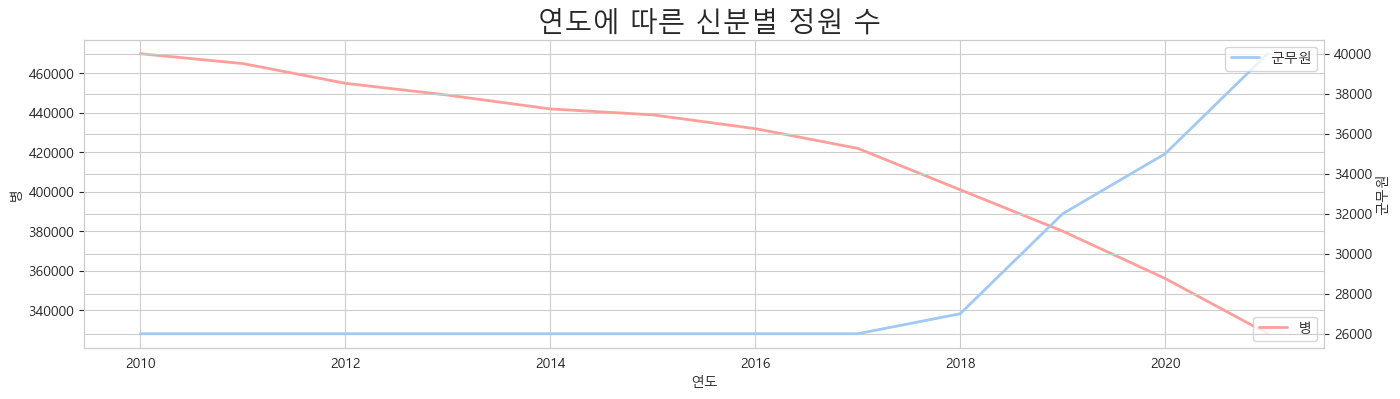

In [8]:
fig, ax1 = plt.subplots(figsize = (16, 4))

sns.lineplot(x = df_g['연도'], y = df_g['병'], 
             color = colors[3], label = '병',
             linewidth = 2, ax = ax1)

ax2 = ax1.twinx()
sns.lineplot(x = df_g['연도'], y = df_g['군무원'], 
             color = colors[0], label = '군무원',
             linewidth = 2, ax = ax2)


ax1.legend(loc = 'lower right')
ax2.legend(loc = 'upper right')

plt.title(' 연도에 따른 신분별 정원 수', fontsize = 20)
plt.show()